In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud


In [27]:
df = pd.read_csv('./datasets/all_merged.csv')
df.head()

,Unnamed: 0,claim,truth_value,source
0,0,Provocation and Disinformation Overview,meter-false,vox-ukraine
1,1,"In Ukraine, the theft and homicide levels rose...",meter-false,vox-ukraine
2,2,Ukrainians beat two Berlin residents for speak...,meter-false,vox-ukraine
3,3,A quote from Paul Goebbels about the Banderites,meter-false,vox-ukraine
4,4,The “Culture of good neighborliness” course fo...,meter-false,vox-ukraine


In [28]:
df['truth_value'].value_counts(), df['source'].value_counts()

(meter-true     7067
 meter-false    1325
 Name: truth_value, dtype: int64,
 nrpublic           2617
 nyt                2266
 politifact         1456
 washington-post     992
 reuters             826
 vox-ukraine         235
 Name: source, dtype: int64)

In [42]:
df.dropna(subset=['claim'], inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 8391
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8136 non-null   int64 
 1   claim        8136 non-null   object
 2   truth_value  8136 non-null   object
 3   source       8136 non-null   object
dtypes: int64(1), object(3)
memory usage: 317.8+ KB


<AxesSubplot:ylabel='truth_value'>

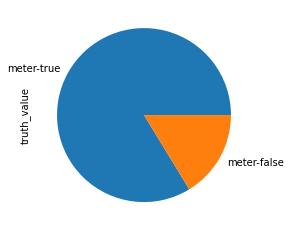

In [43]:
df['truth_value'].value_counts().plot.pie()


<AxesSubplot:ylabel='source'>

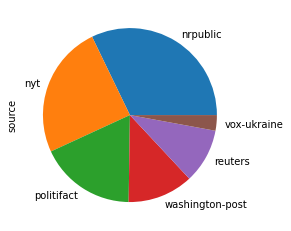

In [44]:
df['source'].value_counts().plot.pie()


<AxesSubplot:>

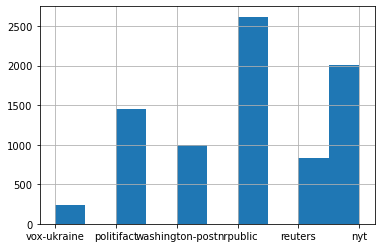

In [63]:
df['source'].hist()


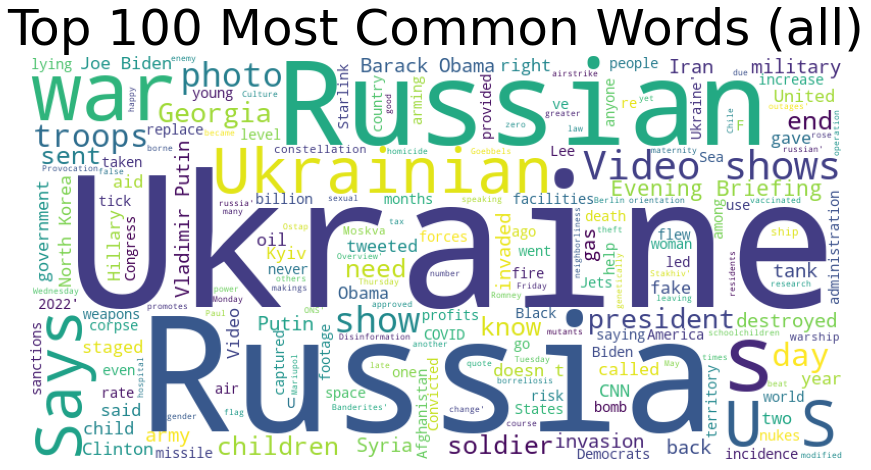

In [45]:
mostcommon = nltk.FreqDist(df['claim']).most_common(100)
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20, 7.5), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words (all)', fontsize=50)
plt.show()


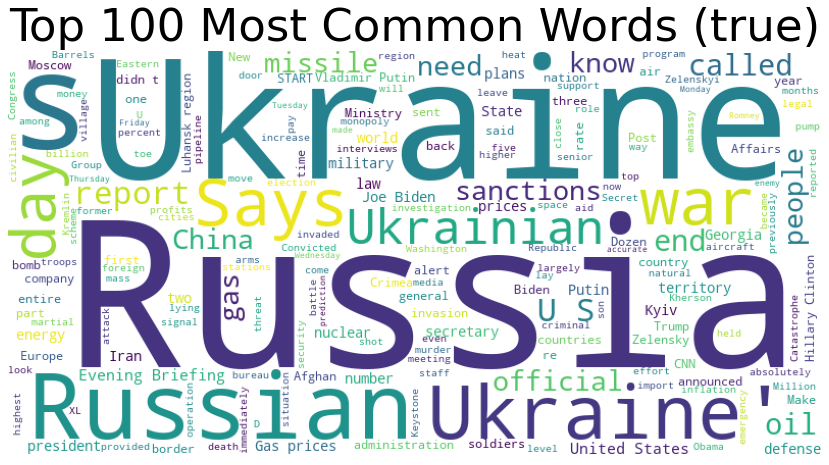

In [46]:
mostcommon = nltk.FreqDist(df[df['truth_value'] == 'meter-true']['claim']).most_common(100)
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20, 7.5), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words (true)', fontsize=45)
plt.show()


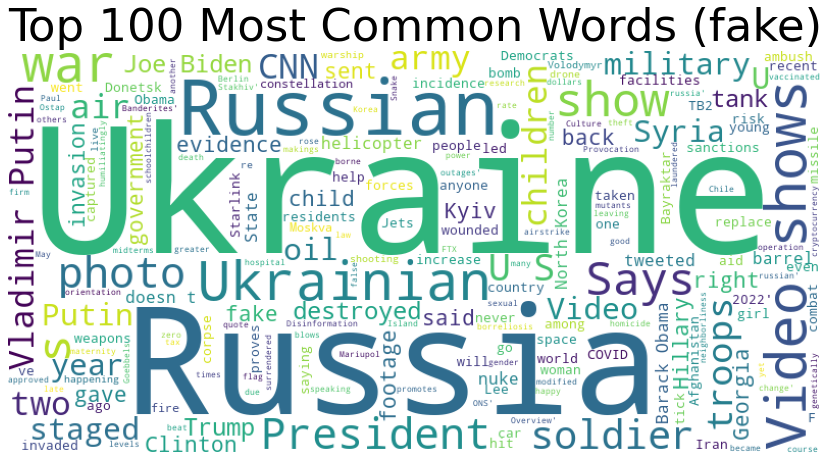

In [52]:
mostcommon = nltk.FreqDist(
    df[df['truth_value'] == 'meter-false']['claim']).most_common(100)
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20, 7.5), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words (fake)', fontsize=45)
plt.show()


In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lokesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [55]:
from nltk.corpus import stopwords

T = df['claim'].str.split(' \n\n---\n\n').str[0]
T = T.str.replace(
    '-', ' ').str.replace('[^\w\s]', '').str.replace('\n', ' ').str.lower()
stop = stopwords.words('english')
T = T.apply(lambda x: ' '.join([y for y in x.split() if not y.isdigit()]))
T = T.apply(lambda words: ' '.join(word.lower()
            for word in words.split() if word not in stop))


C:\Users\Lokesh\AppData\Local\Temp/ipykernel_20520/1500730663.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  T = T.str.replace(


c:\Users\Lokesh\.conda\envs\dlapp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


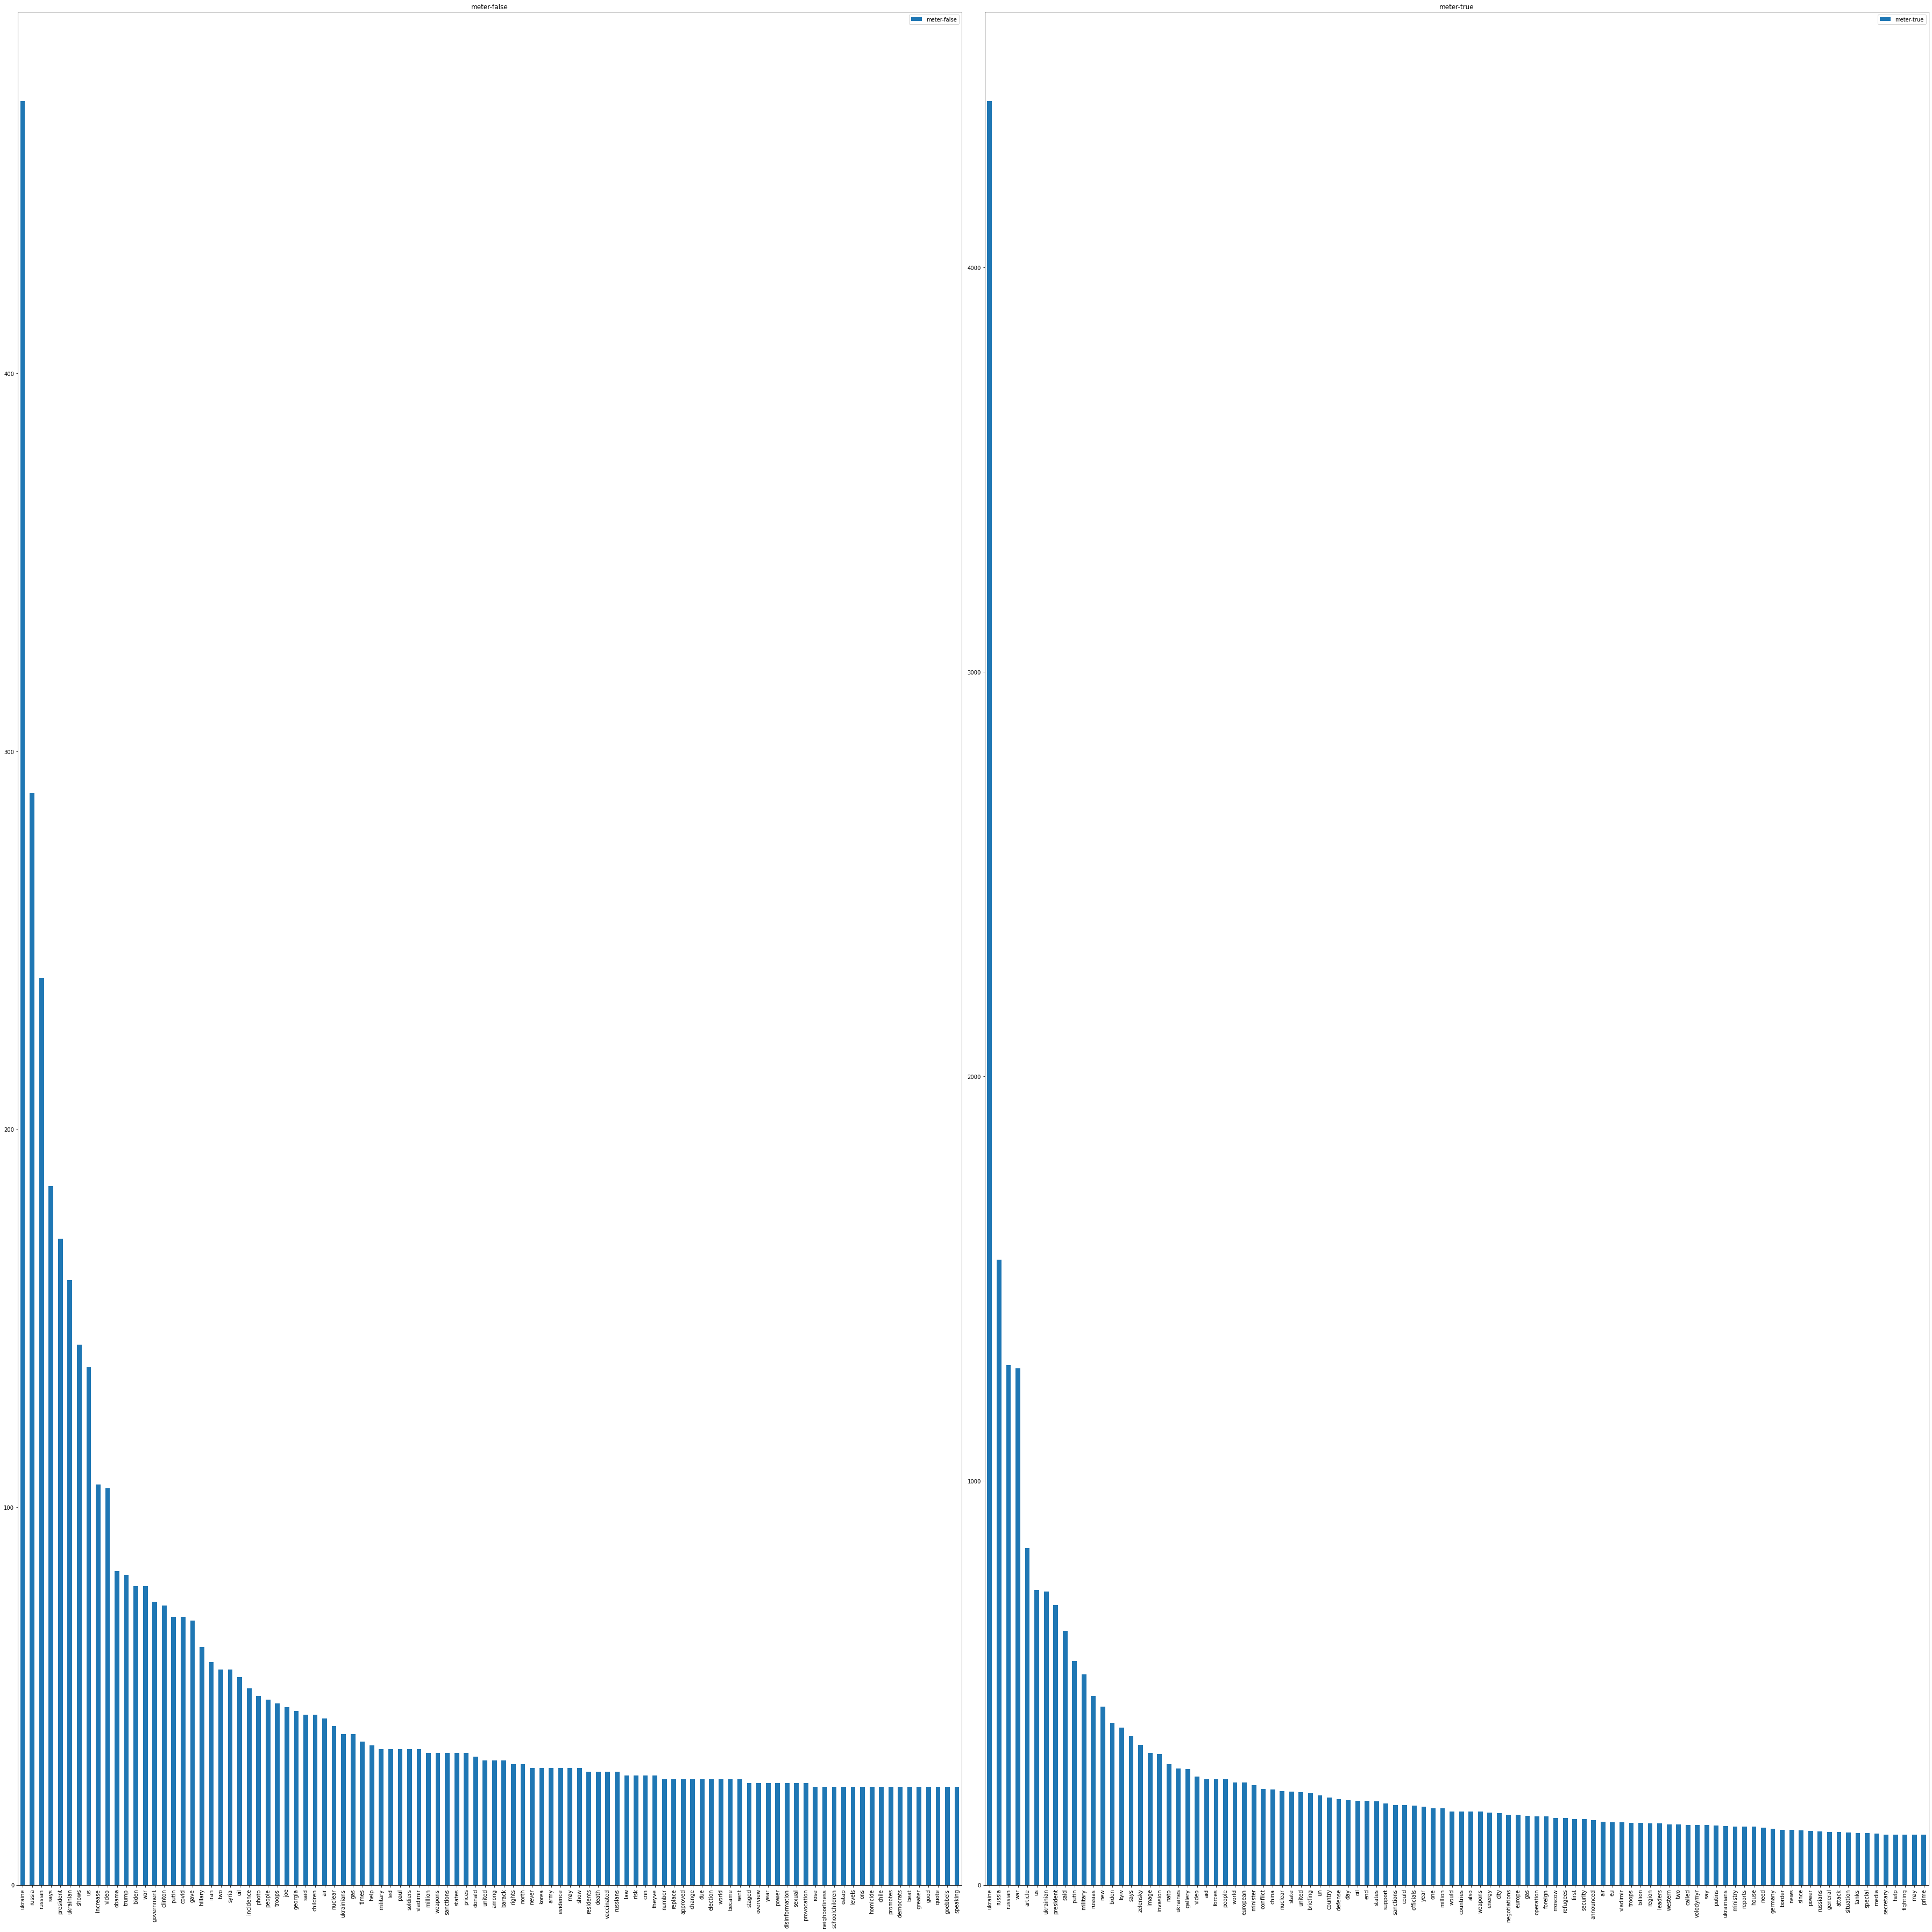

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = T.tolist()
labels = df['truth_value'].tolist()
vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
df_word_freq = pd.DataFrame(index=feature_names, columns=['meter-false', 'meter-true'], data=0)
for i, sentence in enumerate(corpus):
    label = labels[i]
    for word in sentence.split():
        if word in feature_names:
            df_word_freq.loc[word, label] += word_counts[i,
                                                         feature_names.index(word)]

fig, axs = plt.subplots(1, 2, figsize=(50, 50))
for i, label in enumerate(['meter-false', 'meter-true']):
    df_word_freq.sort_values(by=label, ascending=False, inplace=True)
    df_word_freq.head(100).plot(kind='bar', y=label, ax=axs[i], title=label)
plt.tight_layout()
plt.show()


In [62]:
results = set()
T.str.lower().str.split().apply(results.update)
len(results)


11957